In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
# df.to_csv('fuel_data.csv', index=False, )
fuel_df = pd.read_csv('fuel_data.csv', index_col="record_id")


## Basic Structure

In [4]:
fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29523 entries, f1_fuel_1994_12_1_0_7 to f1_fuel_2018_12_12_1_14
Data columns (total 10 columns):
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [5]:
fuel_df.head()

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
record_id,,,,,,,,,,
f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


## Summary Statistics

In [6]:
fuel_df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
# numerical feature : fuel_qty_burned
# central measures
print('Mean fuel quantity burned: {0}'.format(fuel_df.fuel_qty_burned.mean())) # mean
print('Median fuel quantity burned: {0}'.format(fuel_df.fuel_qty_burned.median())) # median

Mean fuel quantity burned: 2622119.38078786
Median fuel quantity burned: 253322.0


In [8]:
# dispersion measures : fuel_qty_burned
print('Minimum fuel quantity burned: {0}'.format(fuel_df.fuel_qty_burned.min()))# minimum
print('Maximum fuel quantity burned: {0}'.format(fuel_df.fuel_qty_burned.max())) # maximum
print('Range fuel quantity burned: {0}'.format(
    fuel_df.fuel_qty_burned.max() - fuel_df.fuel_qty_burned.min())) # range
print('25 percentile: {0}'.format(fuel_df.fuel_qty_burned.quantile(.25))) # 25 percentile
print('50 percentile: {0}'.format(fuel_df.fuel_qty_burned.quantile(.5))) # 50 percentile
print('75 percentile: {0}'.format(fuel_df.fuel_qty_burned.quantile(.75))) # 75 percentile
print('Variance fuel quantity burned: {0}'.format(fuel_df.fuel_qty_burned.var())) # variance
print('Standard deviation fuel quantity burned: {0}'.format(
    fuel_df.fuel_qty_burned.std())) # standard deviation

Minimum fuel quantity burned: 1.0
Maximum fuel quantity burned: 555894250.0
Range fuel quantity burned: 555894249.0
25 percentile: 13817.0
50 percentile: 253322.0
75 percentile: 1424034.0
Variance fuel quantity burned: 83137988310375.34
Standard deviation fuel quantity burned: 9118003.52656081


In [14]:
print('Standard deviation fuel quantity burned: {0}'.format(
    fuel_df.fuel_cost_per_mmbtu.std())) # standard deviation
print('75 percentile: {0}'.format(fuel_df.fuel_cost_per_mmbtu.quantile(.75)))

Standard deviation fuel quantity burned: 2091.5409393535647
75 percentile: 7.745


## Fill missing values for feature : fuel unit

In [9]:
fuel_unit_missing = fuel_df['fuel_unit'].isnull().sum()

In [12]:
fuel_unit_missing/len(fuel_df)

0.00609694136774718

In [9]:
fuel_df.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [10]:
fuel_df[['fuel_unit']] = fuel_df[['fuel_unit']].fillna(value='mcf')
fuel_df.isnull().sum()

utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [11]:
sample_fuel_df = fuel_df.sample(n=1000)

In [12]:
sample_fuel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, f1_fuel_2011_12_63_1_8 to f1_fuel_2000_12_69_1_9
Data columns (total 10 columns):
utility_id_ferc1                1000 non-null int64
report_year                     1000 non-null int64
plant_name_ferc1                1000 non-null object
fuel_type_code_pudl             1000 non-null object
fuel_unit                       1000 non-null object
fuel_qty_burned                 1000 non-null float64
fuel_mmbtu_per_unit             1000 non-null float64
fuel_cost_per_unit_burned       1000 non-null float64
fuel_cost_per_unit_delivered    1000 non-null float64
fuel_cost_per_mmbtu             1000 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 85.9+ KB


In [13]:
%matplotlib inline

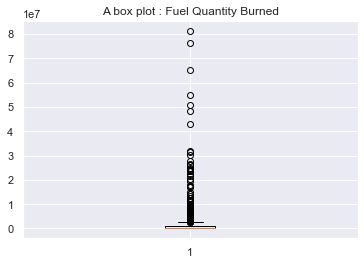

In [14]:
#box-whisker plot : fuel_qty_burned
plt.boxplot(sample_fuel_df.fuel_qty_burned.values);
plt.title('A box plot : Fuel Quantity Burned')

plt.show()

## Categorical features

In [15]:
# .describe(include='all') gets statistics for all columns including non-numeric ones
fuel_df.describe(include='all')

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,29523,29523,29523,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,156,11486,11534,NaN,NaN,NaN,NaN,NaN
mean,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [16]:
# categorical column : plant_name_ferc1
fuel_df.plant_name_ferc1.value_counts()

big stone             156
four corners          151
riverside             133
coyote                121
louisa                119
                     ... 
east river(a)           1
west coxsakie           1
roseton - fn # 2        1
roy s. nelson #3&4      1
miami fort #7 & #8      1
Name: plant_name_ferc1, Length: 2315, dtype: int64

In [17]:
# categorical column (Proportions) :  fuel_type_code_pudl
fuel_df.fuel_type_code_pudl.value_counts(normalize=True)

gas        0.389053
coal       0.289503
oil        0.273143
nuclear    0.027707
waste      0.014938
other      0.005657
Name: fuel_type_code_pudl, dtype: float64

In [18]:
# categorical column :  fuel_unit
fuel_df.fuel_unit.value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

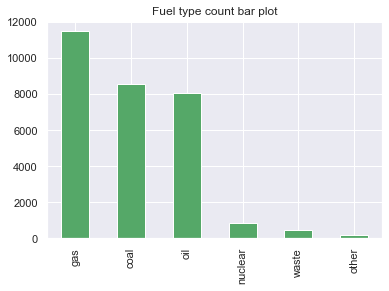

In [19]:
# visualize counts: fuel_type_code_pudl
fuel_df.fuel_type_code_pudl.value_counts().plot(kind='bar', title="Fuel type count bar plot",
                                               color="g")

## Distributions

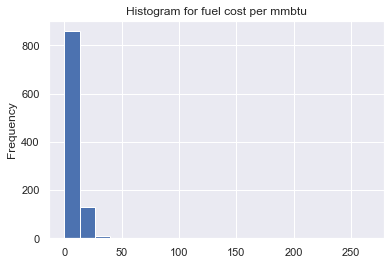

In [26]:
# creating histogram for feature : fuel_cost_per_mmbtu
sample_fuel_df.fuel_cost_per_mmbtu.plot(kind='hist', bins=20,
                                        title="Histogram for fuel cost per mmbtu")

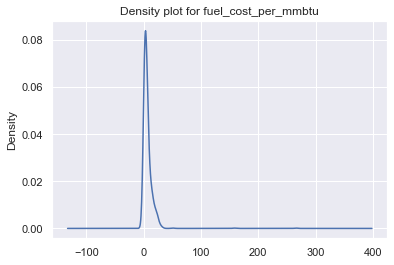

In [21]:
# kde for density plot for feature : fuel_cost_per_mmbtu
sample_fuel_df.fuel_cost_per_mmbtu.plot(kind='kde', title='Density plot for fuel_cost_per_mmbtu')

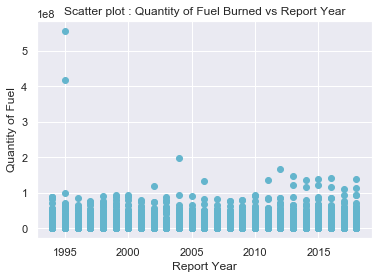

In [22]:
# scatter plot for bi-variate distribution
plt.scatter(fuel_df.report_year, fuel_df.fuel_qty_burned, color='c')
plt.title('Scatter plot : Quantity of Fuel Burned vs Report Year')
plt.xlabel('Report Year')
plt.ylabel('Quantity of Fuel')

plt.show()

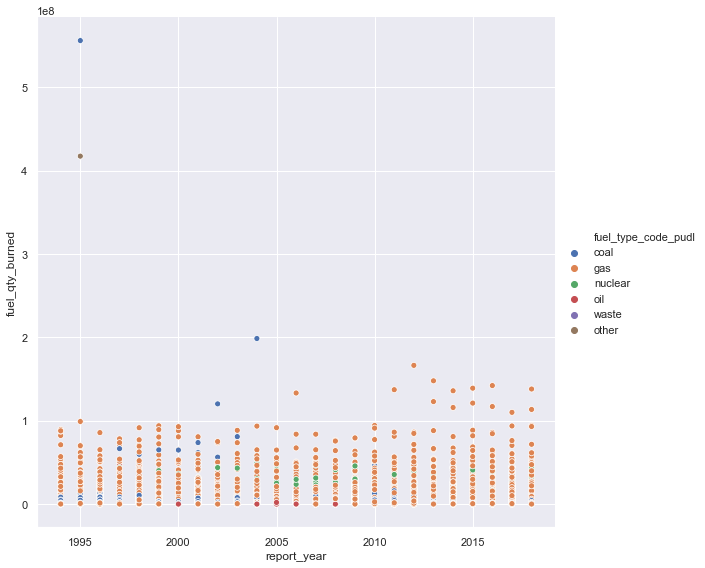

In [23]:
sns.relplot(x='report_year', y='fuel_qty_burned', height=8, aspect=1,
            hue='fuel_type_code_pudl', data=fuel_df)

## Grouping and Aggregations

In [35]:
# group by
fuel_df.groupby('fuel_type_code_pudl').fuel_qty_burned.mean()

fuel_type_code_pudl
coal       1.903473e+06
gas        4.843183e+06
nuclear    5.454838e+06
oil        6.311677e+04
other      2.948137e+06
waste      1.171914e+05
Name: fuel_qty_burned, dtype: float64

In [36]:
fuel_df.groupby('fuel_type_code_pudl').fuel_qty_burned.median()

fuel_type_code_pudl
coal       1018766.0
gas         396990.5
nuclear     760330.5
oil           4919.0
other        11046.0
waste        15636.0
Name: fuel_qty_burned, dtype: float64

In [37]:
fuel_df.groupby(['fuel_type_code_pudl','fuel_unit']).fuel_qty_burned.median()

fuel_type_code_pudl  fuel_unit
coal                 bbl           1290598.0
                     mcf           1190060.5
                     mmbtu        17970750.5
                     ton           1006642.0
gas                  bbl           5449941.0
                     mcf            401829.0
                     mmbtu           33018.0
                     ton           1016330.5
nuclear              gramsU         732604.0
                     kgU               493.5
                     mcf            220186.0
                     mmbtu        36764057.5
                     mwdth          734940.0
                     mwhth        27561584.5
oil                  bbl              4820.5
                     gal            111204.0
                     mcf              3494.5
                     ton              3703.0
other                bbl              8165.0
                     gal               446.0
                     mcf            998284.0
                     ton